# Euler Method

__CYBR 304 & MATH 420__ <br>
_Spring 2024_ <br>

To solve the differential equation (DE) given as $\frac{\mathrm{d} y}{\mathrm{d} t} = F(t,y)$, we integrate this equation with respect to $t$ from $t_0$ to $t_1$. Since we are mathematicians, what we do to the right, we do to the left (side of the equation); thus
\begin{equation}
     \int_{t_0}^{t_1} \frac{\mathrm{d} y}{ \mathrm{d} t} \,\mathrm{d} t  =  \int_{t_0}^{t_1} F(t,y) \, \mathrm{d} t.
\end{equation} 
But we have to be aware that in the integrand on the right side that $y$ actually depends on $t$.  So maybe we should write the dependence of $y$ on $t$ explicitly. Thus
\begin{equation}
     \int_{t_0}^{t_1} \frac{\mathrm{d} y}{ \mathrm{d} t} \mathrm{d} t  = 
     \int_{t_0}^{t_1} F(t,y(t))\mathrm{d} t.
\end{equation} 
The left side is the integral of a derivative, so the fundamental theorem of calculus gives
\begin{equation}
     y(t_1) - y(t_0)  = \int_{t_0}^{t_1} F(t,y(t))\mathrm{d} t.
\end{equation} 
This result is exact--we haven't yet made an approximation. Our approximation is to replace the integral on the right side with a left point rule integation. Thus
\begin{equation}
     y(t_1) - y(t_0)  \approx (t_1 - t_0) F(t_0,y_0).
\end{equation} 
Remember that the left point rule is width times value of the integrand at the lower limit of integration.  Solving for $y(t_1)$ yields
\begin{equation}
     y(t_1) \approx  y(t_0) + (t_1 - t_0) F(t_0,y_0).
\end{equation} 
If $t_0$ and $y(t_0)$ are known, this result allows us to find an approximate value of $y(t_1)$.  And of course once we know the approximate value of $y(t_1)$, we can find the approximate value of $y(t_2)$ using
\begin{equation}
     y(t_2) \approx  y(t_1) + (t_2 - t_1) F(t_1, y(t_1)).
\end{equation}
Continuing like this, we have
\begin{equation}
     y(t_{k+1}) \approx  y(t_k) + (t_{k+1} - t_k) F(t_k,y_k).
\end{equation}
Usually, we choose $t_{k+1} - t_k$ to be a constant, say $h$.  This gives
\begin{align}
     y(t_{k+1}) &\approx  y(t_k) +  h F(t_k,y(t_k)), \\
              t_{k+1} &= h + t_k.
\end{align}
Finally, we usually define $y(t_k) = y_k$.  Doing so gives
\begin{align}
     y_{k+1}  &\approx  y_k  +  h F(t_k,y_k), \\
              t_{k+1} &= h + t_k.
\end{align}
This is the famous _Euler method._ 

In the movie _Hidden Figures,_  Katherine Johnston suggested using the Euler Method--I think that this is method she is referring to.  And I think this part of the movie is historically accurate. If you have not yet seen the movie, it's wonderful. I've seen it three times and would enjoy seeing it a fourth.

The  Julia function `zeros` declares an array of a given type and fills it with zero.

In [2]:
function euler_method(f::Function, t0::Number, y0::Number, t1::Number, N::Integer)
    ya = zeros(typeof(t0),N+1) # declare ya to be a N+1 member array with type typeof(t0)
    ta =  zeros(typeof(t0),N+1)
    h = (t1 - t0)/N #step size
    ta[1] = t0
    ya[1] = y0
    for j = 2:N+1 
        y0 += h*f(t0,y0)
        t0 += h 
        ya[j] = y0    
        ta[j] = t0
    end
    ta, ya
end    

euler_method (generic function with 1 method)

The first argument to `euler_method` is a function of two variables. Let's give our code an easy test; our DE is
$$
   \frac{\mathrm{d} y}{ \mathrm{d} t}  = 1, \quad y = 1.5 \mbox{  when } t = 0
$$
We'll solve this DE (actually it's an initial value problem (IVP) because we have given one point on the solution curve) on the interval $[0,2]$ using 10 steps.  The solution to the IVP is
$$
    y(t) = \frac{3}{2} + t.
$$

In [4]:
X, Y = euler_method((t,y) -> 1, 0.0, 1.5, 2.0, 10);

Let's look at this graphically.  We can also graph the exact solution by mapping $t \mapsto 1.5 + t$ on to the array X. Finally using Gadfly's layer function, we can plot both graphs and use a points for the approximate solution and a curve for the exact solution.

In [7]:
using Gadfly

In [9]:
YY =  map(t -> 1.5+t,X);

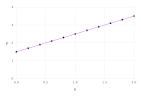

In [11]:
plot(layer(x=X, y=Y,color=[colorant"black"]), layer(x = X, y=map(t -> 1.5+t,X), Geom.line,color=[colorant"darkorchid1"]))

For this DE, the Euler method appears to be exact.  This isn't a huge surprise--the DE is $\frac{\mathrm{d} y}{\mathrm{d} t} = 1 $. Using the the left point rule to integrate the DE we have
$$
   \int_{t_k}^{t_{k+1}} \frac{\mathrm{d} y}{\mathrm{d} t} =  \int_{t_k}^{t_{k+1}}  \mathrm{d} t.  
$$
But we know that the left point rule is exact for a constant function.  That makes the Euler method exact for this IVP.

Let's try the IVP
\begin{equation}
     \frac{\mathrm{d} y}{ \mathrm{d} t}  = \sqrt{1 - y^2}, \quad y=0 \mbox{  when } t =0.
    \end{equation} 
The exact solution on the interval for $t \in [-\pi/2, \pi/2]$ is $y = \sin(t)$. But using a final time of $\pi/2$ gives a domain error for the square root.  

Backing down to a final time of  $0.9 \pi/2$ we get a solution.

In [24]:
X, Y = euler_method((t,y) -> sqrt(1-y^2), 0.0, 0.0, 0.92 * pi/2, 12);

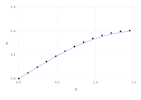

In [26]:
plot(layer(x=X, y=Y,color=[colorant"black"]), layer(x = X, y=map(t -> sin(t),X), Geom.line,color=[colorant"darkorchid1"]))

Unlike our first example, this method isn't exact. Let's try the Euler method on the IVP
\begin{equation}
     \frac{\mathrm{d} y}{ \mathrm{d} t}  = y, \quad y=1 \mbox{  when } t =0.   
\end{equation} 
The exact solution is $y = \mathrm{e}^t$.  Let's try solving on the interval $[0,10]$ using 25 steps. Looks like the solution doesn't grow quite fast enough.

In [28]:
X, Y = euler_method((t,y) -> y, 0.0, 1.0, 10, 25);

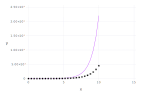

In [30]:
plot(layer(x=X, y=Y,color=[colorant"black"]), layer(x = X, y=map(t -> exp(t),X), Geom.line,color=[colorant"darkorchid1"]))

In [33]:
X, Y = euler_method((t,y) -> y, 0.0, 1.0, 10, 1000);

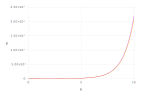

In [35]:
plot(layer(x=X, y=Y,Geom.line, color=[colorant"orange"]), layer(x = X, y=map(t -> exp(t),X), Geom.line,color=[colorant"darkorchid1"]))

Here is a plot of the relative error--it looks linear

In [43]:
E = [100*abs((Y[k] - exp((k-1)/100))/exp((k-1)/100)) for k = 1:1001];

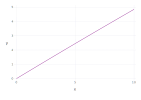

In [45]:
plot(x = X, y = E, Geom.line, color=[colorant"purple"])

Let's try the IVP  $\frac{\mathrm{d} y}{\mathrm{d} t} = - 8 y$ and $y(0) = 1$ on the interval $[0,10]$. The
true solution is $ y = \exp(-8 t)$.  Try 25 steps. Yikes! I'm glad we're not attempting to bring humans home from outerpace! The Euler solution goes bonkers

In [47]:
X, Y = euler_method((t,y) -> -8*y, 0.0, 1.0, 10, 25);

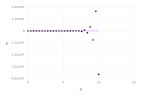

In [49]:
plot(layer(x=X, y=Y,Geom.point, color=[colorant"black"]), layer(x = X, y=map(t -> exp(-8*t),X), Geom.line,color=[colorant"darkorchid1"]))

Yes--you guessed it--we'll learn the theory behind this. 

Here is a fun (for me) example. We'll solve the IVP
$$
   \frac{\mathrm{d} y}{\mathrm{d} t} = \sqrt{1 - y^4}, \quad y(0) = 0.
$$
There is a name for this function: it's a Jacobian elliptic function. And, of course, Julia has a package for that

In [51]:
using Pkg

In [53]:
Pkg.add("Elliptic")

┌ Warning: attempting to remove probably stale pidfile
│   path = "C:\\Users\\Barton\\.julia\\registries\\.pid"
└ @ FileWatching.Pidfile C:\Users\Barton\AppData\Local\Programs\Julia-1.10.0\share\julia\stdlib\v1.10\FileWatching\src\pidfile.jl:273
    Updating registry at `C:\Users\Barton\.julia\registries\General`


LoadError: GitError(Code:ERROR, Class:SSL, Your Julia is built with a SSL/TLS engine that libgit2 doesn't know how to configure to use a file or directory of certificate authority roots, but your environment specifies one via the SSL_CERT_FILE variable. If you believe your system's root certificates are safe to use, you can `export JULIA_SSL_CA_ROOTS_PATH=""` in your environment to use those instead.)

In [55]:
using Elliptic

LoadError: ArgumentError: Package Elliptic not found in current path.
- Run `import Pkg; Pkg.add("Elliptic")` to install the Elliptic package.

When the solution gets close to $1$, we run the risk that we'll get a domain error from the square root function. But in reality, the solution extends to the entire real line. The function wiggles and is periodic much like the sine function:

In [57]:
plot(t -> Jacobi.sn(t,-1), 0.0, 10.0,color=[colorant"darkorchid1"])

Plot(...)

In [59]:
X, Y = euler_method((t,y) -> sqrt(1-y^4), 0.0, 0.0, 1.25, 100);

In [61]:
plot(layer(x=X,y=Y,Geom.line,color=[colorant"black"]), layer(t -> Jacobi.sn(t,-1), 0.0, 1.8, Geom.line,color=[colorant"darkorchid1"]))

Plot(...)